### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras
import csv
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras import layers

### Load Data

In [3]:
folder_path =('D:/Dataset')
zip_path = os.path.join(folder_path, "asl-dataset.zip")
zipper = zipfile.ZipFile(zip_path)
zipper.extractall(folder_path)

In [4]:
train_datagen = ImageDataGenerator( rescale = 1./255)
validation_datagen = ImageDataGenerator( rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
datagen = ImageDataGenerator(
        validation_split = 0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [6]:
train_path = ('D:/Dataset/train/')
validation_path = ('D:/Dataset/validation/')
test_path = ('D:/Dataset/test/')

In [7]:
train_generator = datagen.flow_from_directory(
        train_path,
        subset ='training',
        target_size = (100, 100),
        batch_size = 128,
        class_mode = 'categorical')

val_generator = datagen.flow_from_directory(
        train_path,
        subset ='validation',
        target_size=(100, 100),
        batch_size= 32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(100, 100),
        batch_size= 32,
        class_mode='categorical')

Found 1832 images belonging to 36 classes.
Found 431 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


In [8]:
img = cv2.imread('D:/Dataset/train/0/hand1_0_bot_seg_1_cropped.jpeg')
img.shape

(400, 400, 3)

In [9]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [10]:
train_generator.classes

array([ 0,  0,  0, ..., 35, 35, 35])

### Build Model

In [11]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(36,activation='softmax'))

In [12]:
np.random.seed(123)

model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['acc'])

history = model.fit(train_generator, epochs = 80, steps_per_epoch= 5,
                    validation_data = next(val_generator), verbose = 1)

Epoch 1/80
5/5 [==============================] - 2s 447ms/step - loss: 3.4958 - acc: 0.0531 - val_loss: 3.3323 - val_acc: 0.0938
Epoch 2/80
5/5 [==============================] - 2s 422ms/step - loss: 3.2292 - acc: 0.1266 - val_loss: 2.9935 - val_acc: 0.1562
Epoch 3/80
5/5 [==============================] - 2s 416ms/step - loss: 2.9136 - acc: 0.1797 - val_loss: 2.6598 - val_acc: 0.2500
Epoch 4/80
5/5 [==============================] - 2s 349ms/step - loss: 2.6597 - acc: 0.2156 - val_loss: 2.4893 - val_acc: 0.3438
Epoch 5/80
5/5 [==============================] - 2s 342ms/step - loss: 2.3916 - acc: 0.3406 - val_loss: 2.2624 - val_acc: 0.2812
Epoch 6/80
5/5 [==============================] - 2s 412ms/step - loss: 2.2043 - acc: 0.3609 - val_loss: 2.1374 - val_acc: 0.4375
Epoch 7/80
5/5 [==============================] - 2s 423ms/step - loss: 2.0351 - acc: 0.4004 - val_loss: 2.0710 - val_acc: 0.5000
Epoch 8/80
5/5 [==============================] - 2s 432ms/step - loss: 1.8108 - acc: 0.48

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1280064   
_________________________________________________________________
dense_1 (Dense)              (None, 36)                2

### Evaluate

In [14]:
model.evaluate(val_generator)

14/14 [==============================] - 2s 112ms/step - loss: 0.7412 - acc: 0.8097


[0.7412098050117493, 0.8097447752952576]

### Visualization

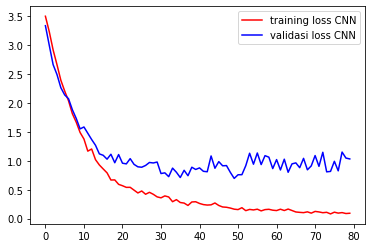

In [15]:
import matplotlib.pyplot as plt

epochs = range(80)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss,'r',label='training loss CNN')
plt.plot(epochs,val_loss,'b',label='validasi loss CNN')
plt.legend()

### Predict

In [16]:
predictions = model.predict(x = test_generator, steps=len(test_generator), verbose=0)

In [17]:
np.argmax(predictions,axis = 1)

array([26, 10, 28, 15,  4, 30, 29,  6, 10,  4, 25,  7, 25, 32, 25, 11, 31,
       31, 23, 17, 31,  7,  8, 12, 35, 25, 17,  2, 26, 19,  8,  7, 25, 33,
        0, 11, 31, 27, 11, 33, 17, 19,  8, 32, 29,  0,  0, 12,  3,  6,  7,
       29, 28, 33, 17,  4, 34, 35,  2,  6, 25, 23, 35, 14, 19,  4, 32, 12,
       17,  3, 32,  0, 30, 27, 33,  8, 25, 29, 13, 30, 22, 16, 24, 35,  7,
       10,  4,  7, 30, 10, 21, 15,  9,  4, 32,  7, 19, 14,  7, 25, 32, 18,
       33, 33,  2,  7, 12, 33, 24, 13, 17,  6, 32, 24, 29, 19, 32, 13, 32,
       32, 18, 32,  4, 35, 23, 32,  1, 16, 21, 23, 18,  4, 33, 24,  8,  8,
       28, 24,  5, 21,  4, 33, 27,  1, 15, 25, 20, 10,  6, 29, 34, 12, 24,
       24, 23, 16, 26, 26, 24, 13, 27, 10, 23,  6,  7,  4, 28, 15,  3, 10,
       27, 13, 25, 21, 23,  4,  6, 29,  5, 16, 18, 19, 19, 26,  3, 14, 23,
       27, 23,  4, 30, 27,  4, 16, 14, 33, 32, 32,  6, 11, 32, 29,  7, 29,
       27, 34, 30,  0, 23, 24, 20,  4, 20, 24, 22, 23, 17,  4,  7, 33, 28,
       30, 10, 17, 19, 26

### Confusion Matrix

In [18]:
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
test_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

Text(0.5, 1.0, 'Confusion Matrix for CNN')

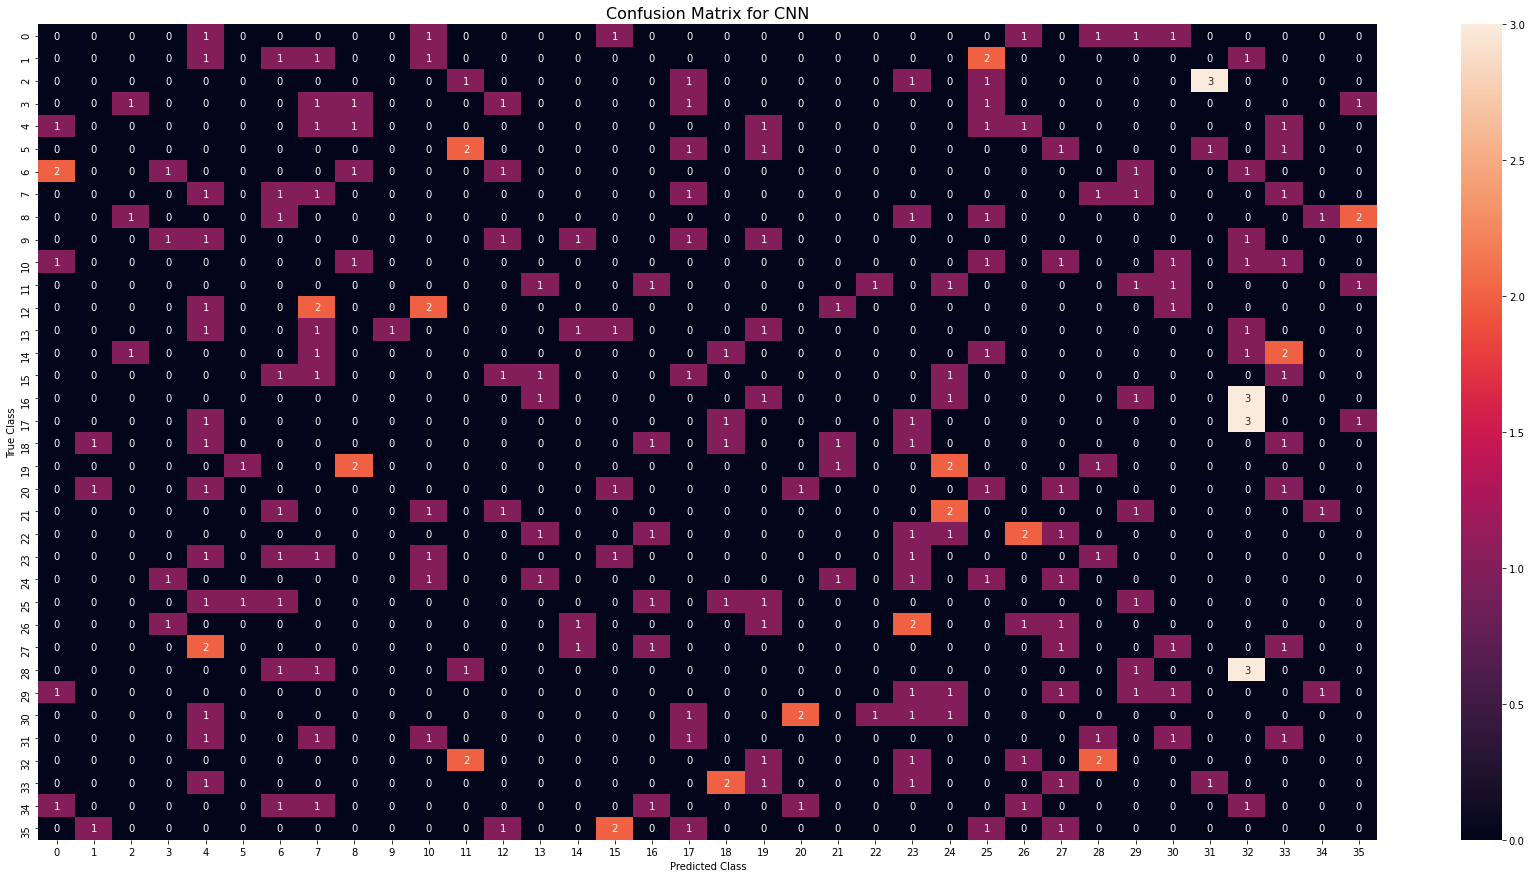

In [20]:
fig = plt.figure(figsize = (30, 15))
sns.heatmap(cm, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for CNN",fontsize = 16)